In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

import matplotlib.pyplot as plt

In [2]:
import analysis_utils as autils

from typing import Dict, List, Tuple

In [3]:
from plot_utils import set_spanish_locale, format_mil_spanish, matplot_formatter_mil_spanish
from plot_utils import plot_histogram_mrs_support_count

set_spanish_locale()

In [71]:
transactions_newank_len4_min = autils.read_clean_transactions("NEWAnk_len4_ALL_min", "output/clean_transactions")
transactions_tpr_len4_min = autils.read_clean_transactions("TPR1_len4_ALL_min", "output/clean_transactions")
transactions_lrr_len4_min = autils.read_clean_transactions("LRR1_len4_ALL_min", "output/clean_transactions")

In [72]:
input_transaction_len4_min = {
    "NEWAnk": transactions_newank_len4_min,
    "TPR1": transactions_tpr_len4_min,
    "LRR1": transactions_lrr_len4_min
}

df_txs_len4_min = autils.build_transaction_len_df(input_transaction_len4_min)

Building transaction_len_df for NEWAnk
Building transaction_len_df for TPR1
Building transaction_len_df for LRR1


In [73]:
# Distribucion del largo de las transacciones por cada familia
def plot_transactions_len_boxplot(df_txs_lens):
    ax_boxplot = df_txs_lens.boxplot(
        column='tx_length', by='family', grid=True, figsize=(7, 5)
    )

    ax_boxplot.get_yaxis().set_major_formatter(matplot_formatter_mil_spanish())
    ax_boxplot.set_ylabel('Cantidad de ítems')
    ax_boxplot.set_xlabel('Familia')

    plt.title("")
    plt.suptitle("")

    fig = ax_boxplot.get_figure()
    return fig


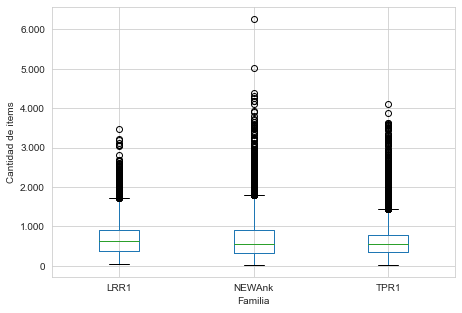

In [76]:
fig = plot_transactions_len_boxplot(df_txs_len4_min)
# fig.savefig('imagenes/kmeras/transactions_mrs_length_boxplot_newank_tpr_lrr.pdf', bbox_inches = "tight")


In [77]:
df_txs_len4_min.groupby('family').describe()

tx_length                                                           
           count        mean         std   min    25%    50%    75%     max
family                                                                     
LRR1     33060.0  656.477405  334.029371  39.0  376.0  637.0  915.0  3472.0
NEWAnk   32169.0  687.846747  475.868210  34.0  339.0  557.0  920.0  6260.0
TPR1     36389.0  615.275330  358.567716  34.0  346.0  566.0  782.0  4099.0

In [4]:
from typing import NamedTuple

class FamilyInput(NamedTuple):
    family: str
    transactions_name: str
    color_code: str


In [5]:
# Ejemplo de NOMRS
def print_all_substrings(ss):
    subs = [ ss[i:i+4] for i in range(len(ss)-4+1) ]
    sb = ""
    for s in subs:
        sb += s + ", "
    print(sb)

print_all_substrings("ABCDEABCDE")

ABCD, BCDE, CDEA, DEAB, EABC, ABCD, BCDE, 


In [6]:
# TODO: Parametrizar len=5
newank_input = FamilyInput("NEWAnk", "NEWAnk_len5_ALL_sub", "#bc5090")
newank_nomrs_input = FamilyInput("NEWAnk_nomrs", "NEWAnk_len5_nomrs", "#003f5c")

In [7]:
def build_txs_by_family(family_inputs): # TODO: typing
    return { 
        fi.family: autils.read_clean_transactions(fi.transactions_name, "output/clean_transactions")
        for fi in family_inputs
    }

In [8]:
family_inputs = [
    newank_input, newank_nomrs_input
]

txs_by_family = build_txs_by_family(family_inputs)

In [9]:
df_txs_length = autils.build_transaction_len_df(txs_by_family)

Building transaction_len_df for NEWAnk
Building transaction_len_df for NEWAnk_nomrs


In [10]:
# df_txs_length.boxplot(column='tx_length', by='family', grid=True, rot=90, figsize=(9, 7))

In [11]:
df_txs_length.groupby('family').describe()

tx_length                                                     \
                 count        mean         std   min    25%    50%    75%   
family                                                                      
NEWAnk         32169.0  664.043613  460.494901  34.0  328.0  534.0  883.0   
NEWAnk_nomrs   32169.0  700.852778  490.814199  34.0  343.0  564.0  936.0   

                      
                 max  
family                
NEWAnk        6606.0  
NEWAnk_nomrs  6909.0

In [12]:
df_freq_data = autils.build_mr_tx_frequency_df(txs_by_family)

Building mr_tx_frequency for NEWAnk
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Building mr_tx_frequency for NEWAnk_nomrs
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Finished


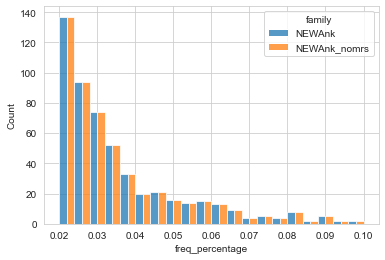

In [13]:
sns.histplot(df_freq_data, x='freq_percentage', hue='family', multiple='dodge', bins=20, binrange=(0.020, 0.1));

In [14]:
# min_support = 0.025
# df_freq_pairs_data = autils.build_pairs_mr_tx_frequency_df(
#     txs_by_family, df_freq_data, min_support)

In [15]:
# TODO: Usar plot_utils.plot_histogram_mrs_support_count

# sns.histplot(df_freq_pairs_data, x='freq_percentage', hue='family', 
#              multiple='dodge', bins=20, binrange=(0.010, 0.05)).set(
#     title='Cantidad de apariciones por frecuencia en pares')
# Se ven mas de 800 por el binrange que tomo. Si tomo binrange en pares y en singles es consistente

In [16]:
def show_tx_len_info_newank_nomrs(length):
    assert length >= 4
    
    family_inputs_len = [
        FamilyInput("NEWAnk", f"NEWAnk_len{length}_ALL_sub", "#bc5090"),
        FamilyInput("NEWAnk_nomrs", f"NEWAnk_len{length}_nomrs", "#003f5c")
    ]
    txs_by_family_len = build_txs_by_family(family_inputs_len)
    df_txs_length_len = autils.build_transaction_len_df(txs_by_family_len)
    return df_txs_length_len.groupby('family').mean()
    

In [55]:
def build_df_family_len_mean(max_len):
    #                  (family, mrtype, displayname)
    inputs_to_build = [("NEWAnk", "ALL_min", "NEWAnk"), 
                       ("NEWAnk", "nomrs", "NEWAnk_NOMRS")]
    length_range = range(4, max_len + 1)
    
    family_len_mean = {
        'family': [],
        'length': [],
        'mean': [],
        'std': [],
        'items_unicos': [],
        'items_total': [],
    }

    for family, mrtype, displayname in inputs_to_build:
        for length in length_range:
            
            transactions_name = f"{family}_len{length}_{mrtype}"
            transactions = autils.read_clean_transactions(transactions_name, "output/clean_transactions")
            
            items_total = 0
            items_unicos = set()
            for tx in transactions:
                for item in tx:
                    items_total += 1
                    items_unicos.add(item)
            
            
            df_txs_length_len = autils.build_transaction_len_df({transactions_name: transactions})
            mean = df_txs_length_len['tx_length'].mean()
            std = df_txs_length_len['tx_length'].std()

            family_len_mean['family'].append(displayname)
            family_len_mean['length'].append(length)
            family_len_mean['mean'].append(mean)
            family_len_mean['std'].append(std)
            family_len_mean['items_unicos'].append(len(items_unicos))
            family_len_mean['items_total'].append(items_total)


    df_family_len_mean = pd.DataFrame(family_len_mean)

    return df_family_len_mean


In [18]:
# Calcular promedios de tamaños de transacciones

In [56]:
df_family_len_mean = build_df_family_len_mean(10)

Building transaction_len_df for NEWAnk_len4_ALL_min
Building transaction_len_df for NEWAnk_len5_ALL_min
Building transaction_len_df for NEWAnk_len6_ALL_min
Building transaction_len_df for NEWAnk_len7_ALL_min
Building transaction_len_df for NEWAnk_len8_ALL_min
Building transaction_len_df for NEWAnk_len9_ALL_min
Building transaction_len_df for NEWAnk_len10_ALL_min
Building transaction_len_df for NEWAnk_len4_nomrs
Building transaction_len_df for NEWAnk_len5_nomrs
Building transaction_len_df for NEWAnk_len6_nomrs
Building transaction_len_df for NEWAnk_len7_nomrs
Building transaction_len_df for NEWAnk_len8_nomrs
Building transaction_len_df for NEWAnk_len9_nomrs
Building transaction_len_df for NEWAnk_len10_nomrs


In [23]:
df_family_len_mean

,family,length,mean,items_unicos,items_total
0,NEWAnk,4,687.846747,158105,22127342
1,NEWAnk,5,663.561037,1666141,21346095
2,NEWAnk,6,346.329883,1855589,11141086
3,NEWAnk,7,135.871429,603460,4370848
4,NEWAnk,8,74.499394,298552,2396571
5,NEWAnk,9,47.517548,192830,1528592
6,NEWAnk,10,32.234001,131166,1035614
7,NEWAnk_NOMRS,4,687.919736,159450,22129690
8,NEWAnk_NOMRS,5,700.852778,2344861,22545733
9,NEWAnk_NOMRS,6,703.995555,8934181,22646833


Text(0.5, 0, 'Tamaño de ítem')

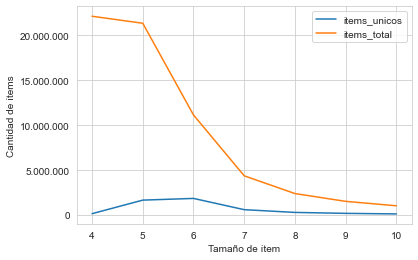

In [57]:
# Plotear items totales de transacciones vs items unicos en transacciones en NEWAnk (comun)
ax = df_family_len_mean[df_family_len_mean['family'] == "NEWAnk"].plot(
    x='length', y=['items_unicos', 'items_total'])
ax.get_yaxis().set_major_formatter(matplot_formatter_mil_spanish())
plt.ylabel('Cantidad de ítems')
plt.xlabel('Tamaño de ítem')


In [64]:
def plot_txs_mrs_vs_kmeras(df_family_len_mean, ycolumn, ylabel):
    assert(ycolumn in ['items_total', 'items_unicos', 'mean'])
    
    label_replacement = {
        "NEWAnk": "MRs",
        "NEWAnk_NOMRS": "KMERAS"
    }
    
    fig, ax = plt.subplots(figsize=(7, 4))
    for label, df in df_family_len_mean.groupby('family'):
        df.plot(x='length', y=ycolumn, ax=ax, label=label_replacement[label])

    ax.ticklabel_format(style='plain')

    ax.get_yaxis().set_major_formatter(matplot_formatter_mil_spanish())
    plt.ylabel(ylabel)
    plt.xlabel('Largo de ítem')
    plt.legend(title="Tipo de transacción")
    
    return fig

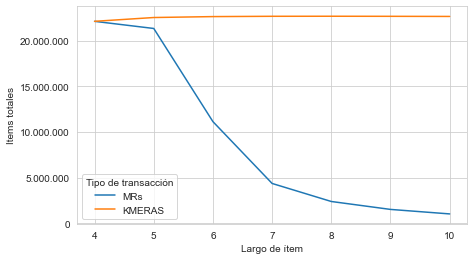

In [65]:
fig = plot_txs_mrs_vs_kmeras(df_family_len_mean, 'items_total', "Items totales")
# fig.savefig('imagenes/kmeras/transacciones_items_totales_por_tam_item.pdf', bbox_inches = "tight")

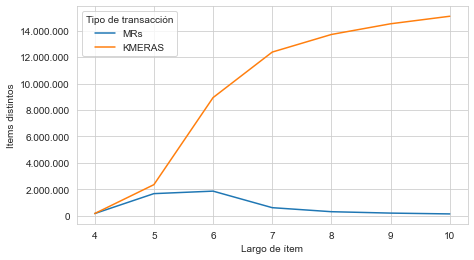

In [66]:
fig = plot_txs_mrs_vs_kmeras(df_family_len_mean, 'items_unicos', "Items distintos")
# fig.savefig('imagenes/kmeras/transacciones_items_unicos_por_tam_item.pdf', bbox_inches = "tight")

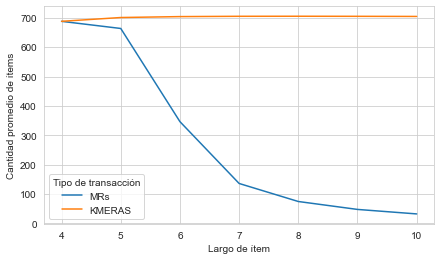

In [68]:
# Se podria usar el parámetro "yerr" para graficar el desvío. 
# El problema es que el grafico no se entiende
#  porque las KMERAS tienen transacciones de todos los tamaños
fig = plot_txs_mrs_vs_kmeras(df_family_len_mean, 'mean', "Cantidad promedio de ítems")

# fig.savefig('imagenes/kmeras/transacciones_largo_promedio_por_tam_item.pdf', bbox_inches = "tight")

In [25]:
df_family_len_mean

,family,length,mean,items_unicos,items_total
0,NEWAnk,4,687.846902,158107,22127347
1,NEWAnk,5,664.043613,1670107,21361619
2,NEWAnk,6,354.914918,1918366,11417258
3,NEWAnk,7,151.531039,705168,4874602
4,NEWAnk,8,91.496783,406929,2943360
5,NEWAnk,9,63.876341,297277,2054838
6,NEWAnk,10,47.779818,229600,1535070
7,NEWAnk_NOMRS,4,687.919736,159450,22129690
8,NEWAnk_NOMRS,5,700.852778,2344861,22545733
9,NEWAnk_NOMRS,6,703.995555,8934181,22646833


In [26]:
# ----------------
# Lo mismo pero con len6

In [27]:
# family_inputs_len6 = [
#     FamilyInput("NEWAnk", "NEWAnk_len6_ALL_sub", "#bc5090"),
#     FamilyInput("NEWAnk_nomrs", "NEWAnk_len6_nomrs", "#003f5c")
# ]

In [28]:
# txs_by_family = build_txs_by_family(family_inputs_len6)

In [29]:
# df_txs_length = autils.build_transaction_len_df(txs_by_family)
# df_txs_length.groupby('family').describe()

Building transaction_len_df for NEWAnk
Building transaction_len_df for NEWAnk_nomrs


tx_length                                                     \
                 count        mean         std   min    25%    50%    75%   
family                                                                      
NEWAnk         32169.0  354.914918  224.833071  31.0  192.0  293.0  458.0   
NEWAnk_nomrs   32169.0  703.995555  494.270678  34.0  345.0  565.0  939.0   

                      
                 max  
family                
NEWAnk        3331.0  
NEWAnk_nomrs  6990.0

In [30]:
# df_freq_data = autils.build_mr_tx_frequency_df(txs_by_family)

Building mr_tx_frequency for NEWAnk
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Building mr_tx_frequency for NEWAnk_nomrs
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Finished


In [31]:
# min_support = 0.025
# df_freq_pairs_data = autils.build_pairs_mr_tx_frequency_df(txs_by_family, df_freq_data, min_support)

build_pairs_mr_tx_frequency_df, min_support: 0.025
Filtering mrs to get most frequents only
Building freqs_by_pair_combinations for NEWAnk...
Filtering transactions_frequents
 .... 0/32169
 .... 10000/32169
 .... 20000/32169
 .... 30000/32169
Building freqs_by_pair_data for NEWAnk...
NEWAnk ready.
Building freqs_by_pair_combinations for NEWAnk_nomrs...
Filtering transactions_frequents
 .... 0/32169
 .... 10000/32169
 .... 20000/32169
 .... 30000/32169
Building freqs_by_pair_data for NEWAnk_nomrs...
NEWAnk_nomrs ready.


In [32]:
# Renombrar para grafico
# df_freq_pairs_data['family'] = df_freq_pairs_data['family'].replace({'NEWAnk_nomrs': 'NEWAnk_KMERAS'})
# df_freq_pairs_data

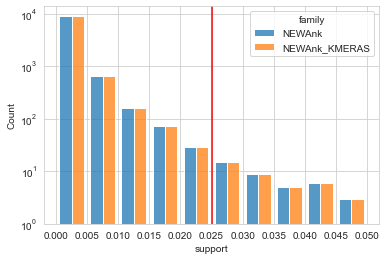

In [36]:
# plot_histogram_mrs_support_count(df_freq_data, min_val, max_val, n_bins
# fig = plot_histogram_mrs_support_count(df_freq_pairs_data, 0.0, 0.050, 10)
# fig.savefig('imagenes/kmeras/freq_pares_mrs_nomrs_newank6.pdf', bbox_inches = "tight")

In [34]:

# plot_freq_pares_nomrs = sns.histplot(df_freq_pairs_data.rename(columns={"freq_percentage": "support"}), 
#                                      x='support', 
#                                      hue='family', 
#              multiple='dodge', bins=20, binrange=(0.010, 0.05))

# plot_freq_pares_nomrs.set_title('Cantidad de pares de ítems para un soporte dado')
# fig = plot_freq_pares_nomrs.get_figure()
# fig.savefig('imagenes/freq_pares_mrs_nomrs_newank6.pdf', bbox_inches = "tight")
